# Nina's first experiments with the facial keypoints detection

In [1]:
# For relative imports
import sys
sys.path.append('/Users/ninakuklisova/facial-keypoint-detection/scripts')

# Import submit module from our tools subfolder
from tools import submit, getdata

Now we are good to use any function in our `submit.py` module. Since we commented our module appropriately, we can even pull up the "documentation":

In [2]:
submit.create_submission?

## Baseline submission

Now that we have our package loaded let's recreate the baseline model for the first feature.  

But first let's do our normal imports

In [3]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor

Let us load the data using `tools.getdata` module:  

In [4]:
# Load data (no dev)
_loaded = getdata.load_data(0, test=True, nonas=True)

FEATURES = _loaded['features']
print 'Number of features:', len(FEATURES)

train_data = _loaded['training']['data']
train_labels = _loaded['training']['labels']
print 'Training dataset size: ', train_data.shape

test_data = _loaded['test']['data']
print 'Test dataset size: ', test_data.shape

Number of features: 30
Training dataset size:  (2140,)
Test dataset size:  (1783,)


Now, let's try the Principal Component Analysis, as in our homework project 3.

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

We first check the shape of the dataset.

We start with transforming the data into the appropriate shape for PCA.

In [7]:
train_data = map(lambda t: list(t), train_data)

We start with a PCA with 2 components.

In [8]:
pca_mod = PCA(n_components = 2)
pca_mod.fit_transform(train_data)
    
print 'Explained variance ratio: \n', np.sum(pca_mod.explained_variance_ratio_ )
print 'Cumulative explained variance: \n', np.sum(pca_mod.explained_variance_ratio_)

Explained variance ratio: 
0.454453273597
Cumulative explained variance: 
0.454453273597


Now, let's see what could we get with a higher number of components.

In [28]:
results = []

for n_comp in range(1, 150):
    print n_comp, ' components'
    pca_mod = PCA(n_components = n_comp)
    pca_mod.fit(train_data)
    
    cum_exp_var = np.sum(pca_mod.explained_variance_ratio_ )
    results.append([n_comp, cum_exp_var])

    print 'Explained variance ratio: \n', pca_mod.explained_variance_ratio_
    print 'Cumulative explained variance: \n', np.sum(pca_mod.explained_variance_ratio_)
    print '\n'

1  components
Explained variance ratio: 
[ 0.30798847]
Cumulative explained variance: 
0.307988470855


2  components
Explained variance ratio: 
[ 0.30798847  0.1464648 ]
Cumulative explained variance: 
0.454453273597


3  components
Explained variance ratio: 
[ 0.30798847  0.1464648   0.08551955]
Cumulative explained variance: 
0.539972827308


4  components
Explained variance ratio: 
[ 0.30798847  0.1464648   0.08551955  0.05644951]
Cumulative explained variance: 
0.596422333511


5  components
Explained variance ratio: 
[ 0.30798847  0.1464648   0.08551955  0.05644951  0.03359219]
Cumulative explained variance: 
0.630014520552


6  components
Explained variance ratio: 
[ 0.30798847  0.1464648   0.08551955  0.05644951  0.03359219  0.02376239]
Cumulative explained variance: 
0.653776910588


7  components
Explained variance ratio: 
[ 0.30798847  0.1464648   0.08551955  0.05644951  0.03359219  0.02376239
  0.02309135]
Cumulative explained variance: 
0.676868263989


8  components
Expla

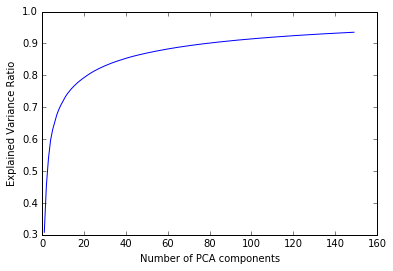

In [30]:
import matplotlib.pyplot as plt
plt.plot(results2[:,0], results2[:,1])
plt.xlabel('Number of PCA components')
plt.ylabel('Explained Variance Ratio')

Now, let's try the Gaussian Mixture models.

We start our exploration of GMM by plotting a heatmap of probability of certain features.

Just to get started, we check out the probabilities of the locations of left eye center.

In [43]:
test_data = map(lambda t: list(t), test_data)

I'm currently trying to figure this out: how can we use GMM with training labels that have floating point values?

In [44]:
pca_mod = PCA(n_components = 150)
pca_train = pca_mod.fit_transform(train_data)

# unique feature that we're testing: left eye center, x coordinate
left_eye_x = pca_train[train_labels[0]]
left_eye_y = pca_train[train_labels[1]]

clf = GMM(n_components = 150, covariance_type = 'full')
gmm_fit = clf.fit(pca_train)

pca_mod2 = PCA(n_components = 150)

pca_test = pca_mod2.fit_transform(test_data)
pred_label = gmm_fit.score(pca_test)

And now we can enjoy the `tools.submit` module!

In [6]:
submit.create_generate(test_data, models, 'tools_example', verbose=True)

Predicting "left_eye_center_x"... done! (136.8s)

... Created the csv file: ../../data/submissions/tools_example_submission.csv


In [7]:
%ls ../../data/submissions/

IdLookupTable.csv                       full_knregressor_submission_nonull.csv
README.md                               tools_example_submission.csv


This function is just a wrapper, we could've used the functions `submit.create_submission` and then `submit.generate_csv`:

```python
# Create predictions
kn_predictions = submit.create_submission(test_data, models, 'tools_example')

# Generate submition csv from predictions
submit.generate_csv(kn_predictions, 'tools_example')
```